In [2]:
# basic imports for data manipulation
import numpy as np
import pandas as pd

In [3]:
# load the dataset
data = pd.read_csv('../Datagathering/data.csv')

<Axes: xlabel='Temp(C)', ylabel='Density'>

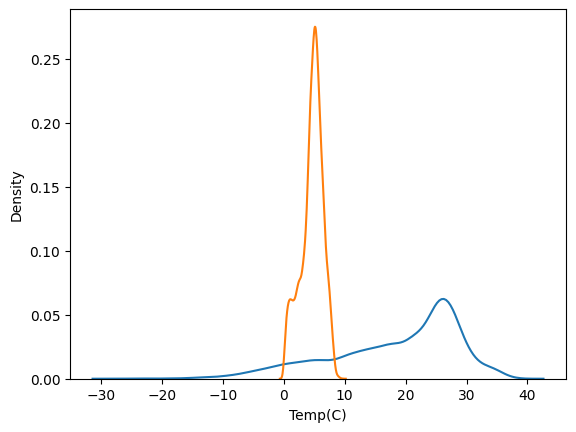

In [4]:
# visualizing the dependency between temperature and solar radiation
import seaborn as sns

sns.kdeplot(data['Temp(C)'])
sns.kdeplot(data['ASSD(kWh/m²/day)'])

In [5]:
# select numeric and categorical features
numeric_features = data[['year ', 'month','ASSD(kWh/m²/day)']]
categorical_features = data[['Region', 'Country']]

In [6]:
# data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# scale numeric features
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)
numeric_features_df = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns)

# encode categorical features
encoder = OneHotEncoder(sparse_output=False)
categorical_features_encoded = encoder.fit_transform(categorical_features)
categorical_features_df = pd.DataFrame(categorical_features_encoded, columns=encoder.get_feature_names_out(categorical_features.columns))

# combine the processed features
processed_data = pd.concat([numeric_features_df, categorical_features_df], axis=1)

In [7]:
# assign the processed features to x and the target variable to y
x = processed_data
y = data['Temp(C)']

In [8]:
# data splitting
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor

# initialize the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model
rf_model.fit(x_train, y_train)

# make predictions
y_train_rf_pred = rf_model.predict(x_train)
y_test_rf_pred = rf_model.predict(x_test)

# evaluate the model
rf_mse = mean_squared_error(y_test, y_test_rf_pred)
rf_r2 = r2_score(y_test, y_test_rf_pred)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R^2 Score: {rf_r2}')

Random Forest Mean Squared Error: 2.2351072476427354
Random Forest R^2 Score: 0.9797095057762198


In [10]:
# save the model
import joblib
joblib.dump(rf_model, '../Models/temp.pkl')

['../Models/temp.pkl']

In [11]:
# cross-validation and scaler to ensure model robustness
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-validated R² scores: [0.97879394 0.97823417 0.97854023 0.97801172 0.97780401]
Mean R²: 0.9782768171438718


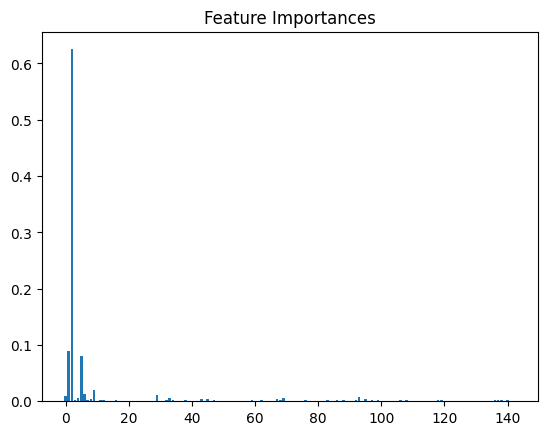

In [12]:
# following code to visualize feature importances (most important features is ASSD which should be the most important feature)
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
plt.bar(range(len(importances)), importances)
plt.title("Feature Importances")
plt.show()


<Axes: >

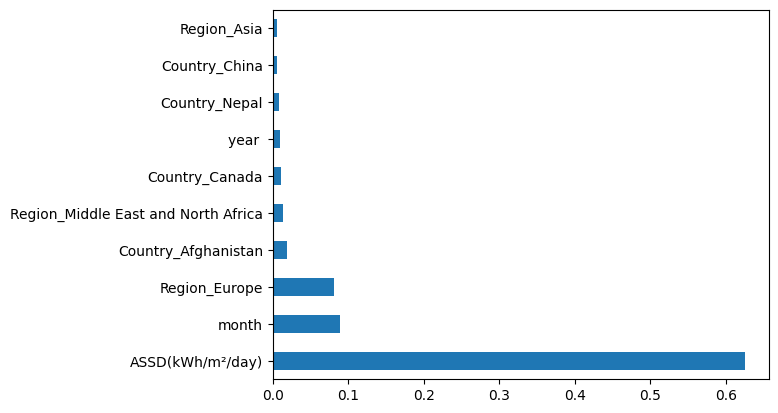

In [13]:
import pandas as pd

feature_names = x.columns
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values(ascending=False).head(10).plot(kind='barh')


In [14]:
x.head()

,year,month,ASSD(kWh/m²/day),Region_Americas,Region_Asia,Region_Europe,Region_Middle East and North Africa,Region_Pacific,Region_Sub-Saharan Africa,Country_Afghanistan,...,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Zambia,Country_Zimbabwe
0,-1.655032,-1.593255,0.551043,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.655032,-1.303572,0.650906,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.655032,-1.013890,0.728576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.655032,-0.724207,1.238983,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.655032,-0.434524,0.312484,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
joblib.dump(encoder, '../models/encoder2.pkl')
joblib.dump(scaler, '../models/scaler2.pkl')

['../models/scaler2.pkl']